In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("/Users/intanfarhi/Documents/Purwadhika/CapstoneProject3/SupermarketCustomers.csv", sep='\t')

In [5]:
print(df.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

Intercept: 0.5681370921350042
Coefficients: [0.09088117 0.26501754]
R² Score: 0.481108409798949
MSE: 0.6485996190543518


Intercept: 0.5681370921350042
Coefficients: [0.09088117 0.26501754]
R² Score: 0.481108409798949
MSE: 0.6485996190543518


In [6]:
# Cek Nilai kosong
missing_value = df.isnull().sum()
print(missing_value)

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [7]:
# Menghapus income yang kosong
df = df.dropna(subset=['Income'])

In [8]:
print(df['Income'].describe())

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64


In [9]:
# Cek duplikasi
duplicates = df.duplicated().sum()
print(f'Duplicate: {duplicates}')

Duplicate: 0


<Axes: ylabel='Income'>

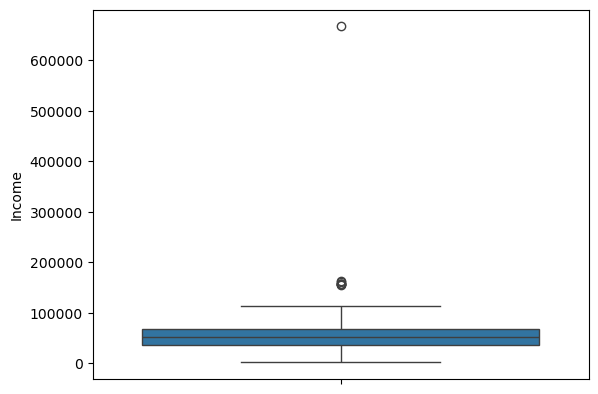

In [11]:
# Cek boxplot untuk cek outlier
sns.boxplot(df['Income'])

In [ ]:
# Hapus outlier
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df[(df['Income'] >= lower_bound) & (df['Income'] <= upper_bound)]


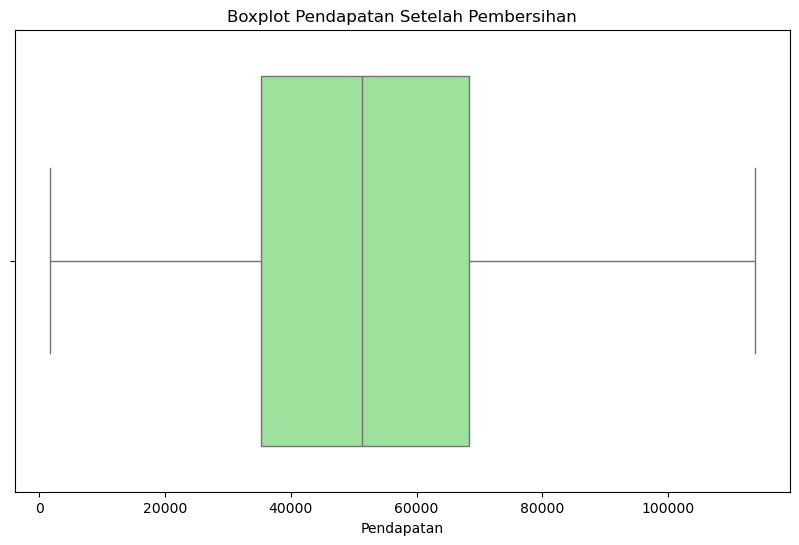

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['Income'], color='lightgreen')
plt.title('Boxplot Pendapatan Setelah Pembersihan')
plt.xlabel('Pendapatan')
plt.show()

In [53]:
print("\nStatistik Deskriptif untuk Pendapatan:")
print(df_cleaned['Income'].describe())


Statistik Deskriptif untuk Pendapatan:
count      2208.000000
mean      51633.638134
std       20713.376530
min        1730.000000
25%       35196.000000
50%       51301.000000
75%       68289.750000
max      113734.000000
Name: Income, dtype: float64


In [51]:
# Rename MntWines and MntMeatProducts
df_cleaned.rename(columns={
    'MntWines': 'Pengeluaran untuk Wine',
    'MntMeatProducts': 'Pengeluaran untuk produk daging'
}, inplace=True)

/var/folders/mw/z3kzz6w94jlg5x6x44_4d6qm0000gn/T/ipykernel_4200/3404598044.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.rename(columns={


In [18]:
# Membagi pelanggan menjadi 3 kategori pendapatan
# Low, Medium, dan High
bins = [0, 35000, 70000, 120000]
labels = ['Rendah', 'Sedang', 'Tinggi']
df_cleaned['Golongan Pendapatan'] = pd.cut(df_cleaned['Income'], bins=bins, labels=labels)

# Rata-rata pengeluaran untuk produk wine dan daging pada kategori pendapatan
SpendByIncome = df_cleaned.groupby('Golongan Pendapatan')[['Pengeluaran untuk Wine', 'Pengeluaran untuk produk daging']].mean()
print("\nRata-rata Pengeluaran Berdasarkan Golongan Pendapatan:")
print(SpendByIncome)


Rata-rata Pengeluaran Berdasarkan Golongan Pendapatan:
                     Pengeluaran untuk Wine  Pengeluaran untuk produk daging
Golongan Pendapatan                                                         
Rendah                            21.324226                        22.289617
Sedang                           292.233822                       114.053494
Tinggi                           650.930000                       441.326000


/var/folders/mw/z3kzz6w94jlg5x6x44_4d6qm0000gn/T/ipykernel_4200/995155997.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Golongan Pendapatan'] = pd.cut(df_cleaned['Income'], bins=bins, labels=labels)
/var/folders/mw/z3kzz6w94jlg5x6x44_4d6qm0000gn/T/ipykernel_4200/995155997.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  SpendByIncome = df_cleaned.groupby('Golongan Pendapatan')[['Pengeluaran untuk Wine', 'Pengeluaran untuk produk daging']].mean()


Text(0.5, 0, 'Golongan Pendapatan')

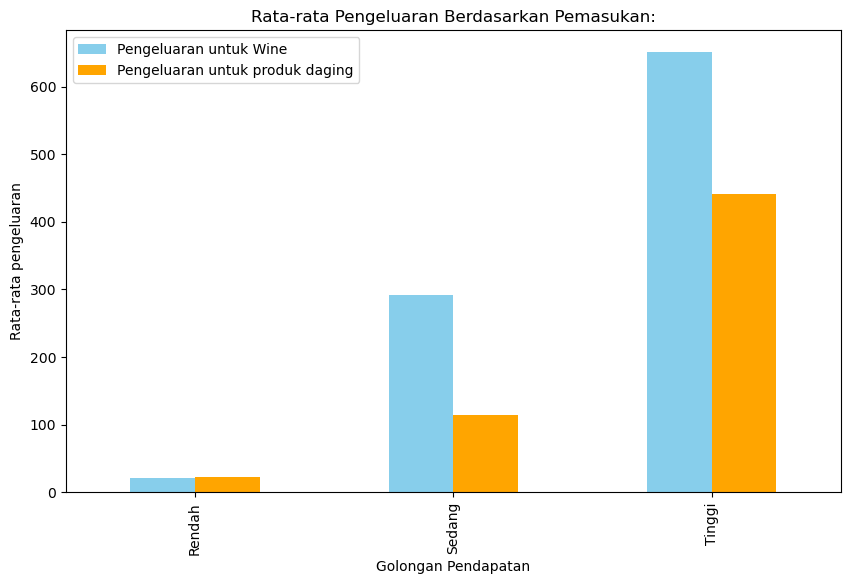

In [19]:
# Visualisasi Histogram

SpendByIncome.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'])  
plt.title('Rata-rata Pengeluaran Berdasarkan Pemasukan:') 
plt.ylabel('Rata-rata pengeluaran') 
plt.xlabel('Golongan Pendapatan')


**MENGKATEGORIKAN STATUS PERNIKAHAN DAN JUMLAH ANAK DENGAN PEMBELIAN**

In [92]:
# Menambah Variabel lain
df= df.dropna(subset=['Marital_Status', 'Kidhome'])

In [93]:
# Melihat nilai unik dari status pernikahan
print("\nKategori di 'Marital_Status':")
print(df['Marital_Status'].unique())


Kategori di 'Marital_Status':
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone']


In [129]:
# Menseleksi status yang tidak jelas
marital_map = {
    'Single': 'Single',
    'Alone': 'Single',
    'Together': 'Married',
    'Married': 'Married',
    'Divorced': 'Single Parent',
    'Widow': 'Single Parent',
    'Absurd': 'Other',
    'YOLO': 'Other'}

df['Cleaned_Marital_Status'] = df['Marital_Status'].map(marital_map)
df = df[df['Cleaned_Marital_Status'] != 'Other']


In [111]:
df.rename(columns={
    'MntWines': 'Pengeluaran untuk Wine',
    'MntMeatProducts': 'Pengeluaran untuk Produk Daging'
}, inplace=True)

In [112]:
marital_segment = df.groupby('Cleaned_Marital_Status')[['Pengeluaran untuk Wine', 'Pengeluaran untuk Produk Daging']].mean()

print("\nRata-rata Pengeluaran Berdasarkan Status Pernikahan:")
print(marital_segment)


Rata-rata Pengeluaran Berdasarkan Status Pernikahan:
                        Pengeluaran untuk Wine  \
Cleaned_Marital_Status                           
Married                             303.280420   
Single                              290.656118   
Single Parent                       335.279221   

                        Pengeluaran untuk Produk Daging  
Cleaned_Marital_Status                                   
Married                                      163.120280  
Single                                       183.845992  
Single Parent                                158.873377  


<Figure size 1000x600 with 0 Axes>

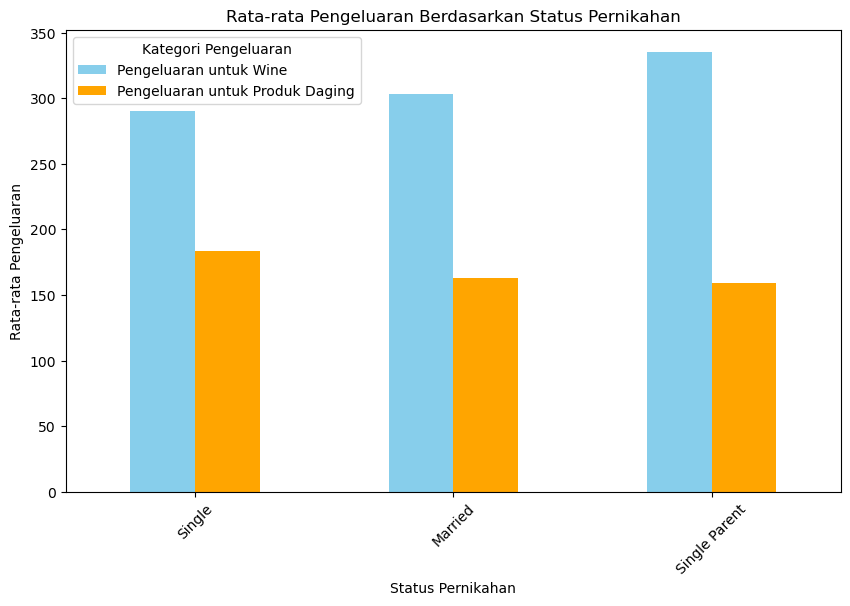

In [237]:
# Visualisasi Histogram

# Mengurutkan kategori
order = ['Single', 'Married', 'Single Parent']
marital_segment = marital_segment.reindex(order)

#Visualisasi
plt.figure(figsize=(10, 6))
marital_segment.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'])
plt.title('Rata-rata Pengeluaran Berdasarkan Status Pernikahan')
plt.ylabel('Rata-rata Pengeluaran')
plt.xlabel('Status Pernikahan')
plt.xticks(rotation=45)
plt.legend(title='Kategori Pengeluaran')
plt.show()

Pengeluaran berdasarkan Jumlah Anak

In [134]:
df = df.dropna(subset=['Kidhome'])

In [137]:
child_segment = df.groupby('Kidhome')[['Pengeluaran untuk Wine', 'Pengeluaran untuk Produk Daging']].mean()
print("\nRata-rata Pengeluaran Berdasarkan Jumlah Anak di Rumah:")
print(child_segment)


Rata-rata Pengeluaran Berdasarkan Jumlah Anak di Rumah:
         Pengeluaran untuk Wine  Pengeluaran untuk Produk Daging
Kidhome                                                         
0                    452.592651                       253.630962
1                    104.340474                        49.109357
2                     72.000000                        30.086957


<Figure size 1000x600 with 0 Axes>

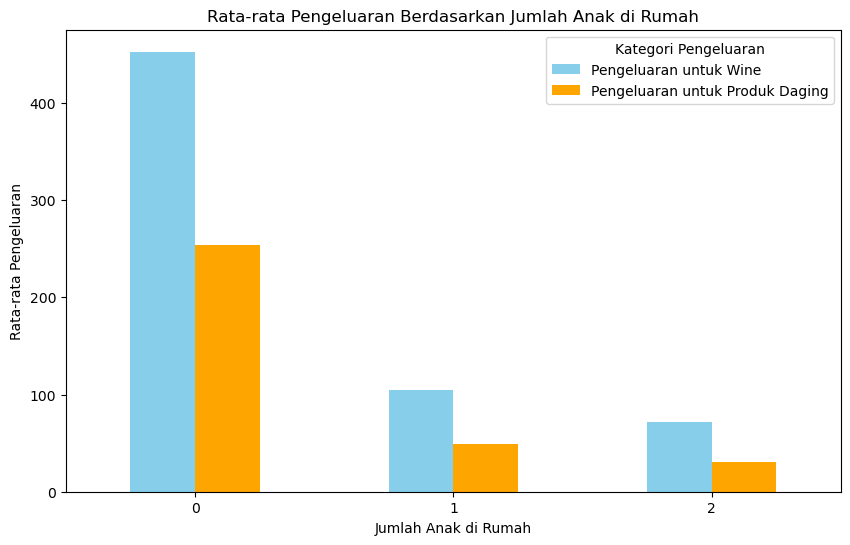

In [140]:
# 4. Visualisasi Rata-rata Pengeluaran Berdasarkan Jumlah Anak
plt.figure(figsize=(10, 6))
child_segment.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'])
plt.title('Rata-rata Pengeluaran Berdasarkan Jumlah Anak di Rumah')
plt.ylabel('Rata-rata Pengeluaran')
plt.xlabel('Jumlah Anak di Rumah')
plt.xticks(rotation=0)  
plt.legend(title='Kategori Pengeluaran')
plt.show()

Eksplorasi ketiganya

In [249]:
df = df.dropna(subset=['Kidhome', 'Marital_Status', 'Income', 'Pengeluaran untuk Wine', 'Pengeluaran untuk Produk Daging'])

In [250]:
df['Pengeluaran Total'] = df['Pengeluaran untuk Wine'] + df['Pengeluaran untuk Produk Daging']

In [251]:
pivot_table = pd.pivot_table(
    df,
    values='Pengeluaran Total',  # Gunakan hanya Pengeluaran Total
    index=['Kidhome', 'Cleaned_Marital_Status'],
    columns='Golongan Pendapatan',
    aggfunc='mean'
)

print("\nTabel Pivot Pengeluaran Berdasarkan Jumlah Anak, Status Pernikahan, dan Pendapatan:")
print(pivot_table)



Tabel Pivot Pengeluaran Berdasarkan Jumlah Anak, Status Pernikahan, dan Pendapatan:
Golongan Pendapatan                   Low      Medium         High
Kidhome Cleaned_Marital_Status                                    
0       Married                 32.967213  520.691304  1105.600000
        Single                  64.800000  538.673759  1164.095238
        Single Parent           32.846154  585.145299  1010.865672
1       Married                 35.554286  173.242105   949.800000
        Single                  31.378788  135.753968   913.000000
        Single Parent           31.173913  120.846154  1067.600000
2       Married                 24.000000  145.954545   389.000000
        Single                  10.000000   85.666667          NaN
        Single Parent           35.000000   14.500000          NaN


/var/folders/mw/z3kzz6w94jlg5x6x44_4d6qm0000gn/T/ipykernel_4200/3941467867.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(


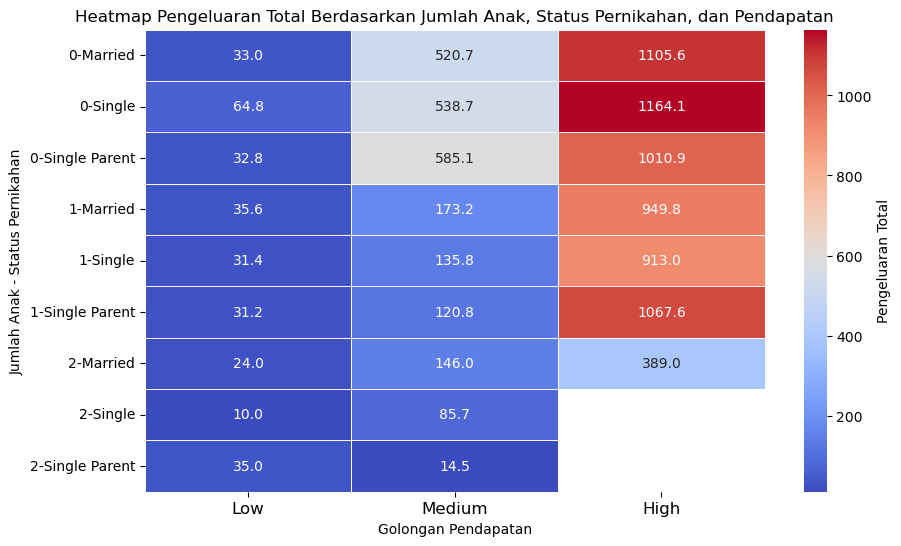

In [248]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_table,  # Gunakan pivot table yang disederhanakan
    annot=True,
    fmt='.1f',
    cmap='coolwarm',
    cbar_kws={'label': 'Pengeluaran Total'},
    linewidths=0.5
)
plt.title('Heatmap Pengeluaran Total Berdasarkan Jumlah Anak, Status Pernikahan, dan Pendapatan')
plt.xlabel('Golongan Pendapatan')
plt.ylabel('Jumlah Anak - Status Pernikahan')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=10)
plt.show()


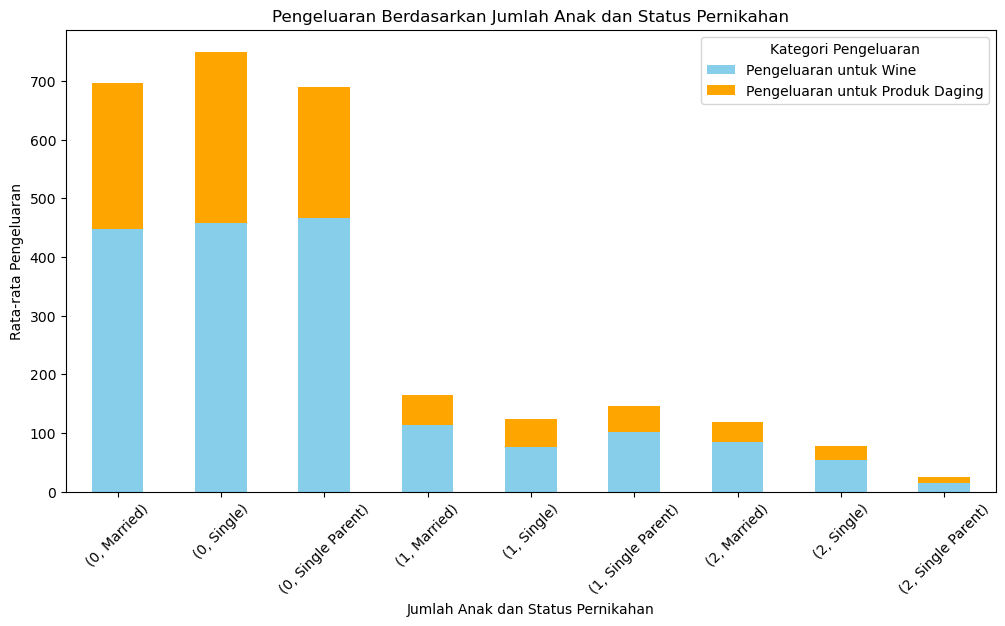

In [252]:
df_grouped = df.groupby(['Kidhome', 'Cleaned_Marital_Status'])[['Pengeluaran untuk Wine', 'Pengeluaran untuk Produk Daging']].mean()

df_grouped.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    color=['skyblue', 'orange']
)
plt.title('Pengeluaran Berdasarkan Jumlah Anak dan Status Pernikahan')
plt.ylabel('Rata-rata Pengeluaran')
plt.xlabel('Jumlah Anak dan Status Pernikahan')
plt.xticks(rotation=45)
plt.legend(title='Kategori Pengeluaran')
plt.show()

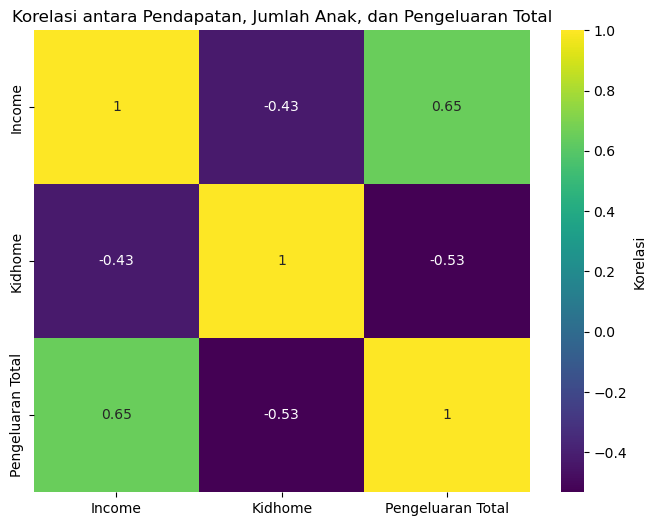

In [253]:
correlation_matrix = df[['Income', 'Kidhome', 'Pengeluaran Total']].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='viridis',
    cbar_kws={'label': 'Korelasi'}
)
plt.title('Korelasi antara Pendapatan, Jumlah Anak, dan Pengeluaran Total')
plt.show()